# Estrategia de retención de clientes para la cadena de gimnasios Model fitness


La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo saber si un/a cliente ya no está? Podemos calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Vamos a analizar y elaborar una estrategia de retención de clientes.

In [34]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans


In [3]:
gym_data = pd.read_csv('gym_churn_us.csv')
gym_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### 1-Preparar los datos para el análisis

In [4]:
gym_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
gym_data.duplicated().sum()

np.int64(0)

In [7]:
#Nombres de columnas a minúsculas
gym_data.columns =gym_data.columns.str.lower()
gym_data.head()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
# Cálculo de medias y varianzas
means = gym_data.mean(numeric_only=True)
variances = gym_data.var(numeric_only=True)

# Comparación
comparison = pd.DataFrame({
    'Media': means,
    'Varianza': variances
})

print(comparison)

                                        Media     Varianza
gender                               0.510250     0.249957
near_location                        0.845250     0.130835
partner                              0.486750     0.249887
promo_friends                        0.308500     0.213381
phone                                0.903500     0.087210
contract_period                      4.681250    20.699823
group_visits                         0.412250     0.242361
age                                 29.184250    10.616956
avg_additional_charges_total       146.943728  9284.402113
month_to_end_contract                4.322750    17.566974
lifetime                             3.724750    14.057002
avg_class_frequency_total            1.879020     0.945260
avg_class_frequency_current_month    1.767052     1.108610
churn                                0.265250     0.194941


##### Identificar patrones de comportamiento y dispersión en las variables clave del dataset para orientar decisiones estratégicas en retención de clientes.


- Alta dispersión en cargos adicionales

La variable avg_additional_charges_total presenta una media de $146.94 y una varianza extremadamente alta (9284.40).

Esto indica que algunos clientes generan ingresos significativamente mayores que otros. Es crucial segmentarlos para diseñar estrategias de fidelización específicas.

- Contratos y permanencia

contract_period, month_to_end_contract y lifetime muestran medias moderadas pero varianzas elevadas (20.70, 17.57 y 14.06 respectivamente).

Esto sugiere que la duración del contrato y el tiempo de vida del cliente varían ampliamente. Se recomienda analizar si los contratos más largos se correlacionan con menor tasa de abandono (churn).

- Frecuencia de clases

Las variables avg_class_frequency_total y avg_class_frequency_current_month tienen medias cercanas a 1.8 y varianzas bajas.

Esto indica un comportamiento relativamente homogéneo en la asistencia a clases. Sin embargo, pequeñas diferencias podrían ser relevantes para predecir abandono.

- Variables demográficas y de contacto

Variables como gender, partner, promo_friends, y phone tienen medias cercanas a 0.5–0.9 y varianzas bajas, lo que indica una distribución equilibrada.

Aunque no muestran alta dispersión, podrían ser útiles como factores de segmentación en campañas de marketing.

- Edad

La edad tiene una media de 29.18 años y una varianza de 10.61, lo que refleja una base de clientes relativamente joven pero con cierta diversidad generacional.

- Churn

La tasa de abandono (churn) tiene una media de 0.265 y varianza de 0.194, lo que indica que aproximadamente el 26% de los clientes han abandonado.

Este valor es crítico para modelar predicciones y diseñar estrategias de retención.

##### Recomendaciones Estratégicas
- Segmentar por ingresos adicionales: Identificar clientes con altos cargos adicionales para ofrecerles beneficios exclusivos.

- Optimizar duración de contratos: Analizar si los contratos más largos reducen el churn y promoverlos en nuevos clientes.

- Monitorear frecuencia de uso: Detectar caídas en la asistencia mensual como posible indicador de abandono.

- Diseñar campañas personalizadas: Usar variables como edad, género y presencia de amigos (promo_friends) para personalizar la comunicación.

In [10]:
grouped_means = gym_data.groupby('churn').mean(numeric_only=True)
grouped_means

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Principales Diferencias Observadas
- Compromiso contractual y permanencia

Los clientes que se quedan tienen un contrato promedio de 5.7 meses, mientras que los que se van solo tienen 1.7 meses.

Su tiempo de vida como cliente también es más del cuádruple (4.71 vs. 0.99).

Esto sugiere que contratos más largos están fuertemente asociados con la retención. Reforzar la venta de planes de mayor duración podría reducir el churn.

- Frecuencia de uso

Los clientes retenidos asisten con mayor frecuencia: 2.02 clases promedio vs. 1.47 en total, y 2.03 vs. 1.04 en el mes actual.

Esto indica que la baja participación es un predictor de cancelación. Se recomienda implementar alertas internas para detectar caídas en la asistencia.

- Interacciones sociales

El indicador promo_friends es más alto en clientes retenidos (0.35 vs. 0.18), lo que sugiere que tener amigos en el gimnasio mejora la permanencia.

Se recomienda reforzar programas de referidos y actividades grupales.

- Ubicación y edad

Los clientes que se quedan viven más cerca del gimnasio (0.87 vs. 0.76) y son ligeramente mayores (30 años vs. 27).

Esto podría indicar que la proximidad y la madurez influyen en la constancia. Se sugiere segmentar campañas por zona y edad.

- Cargos adicionales

Los clientes retenidos generan más ingresos adicionales ($158 vs. $115), lo que podría reflejar mayor uso de servicios complementarios.

Incentivar el uso de estos servicios podría aumentar el valor del cliente y su fidelidad.

#### Recomendaciones Estratégicas

Fomentar contratos largos con beneficios exclusivos.

Detectar y actuar ante baja asistencia con campañas de reactivación.

Potenciar el componente social mediante referidos y clases grupales.

Segmentar por ubicación y edad para personalizar la experiencia.

Promover servicios adicionales como entrenamientos personalizados o nutrición.

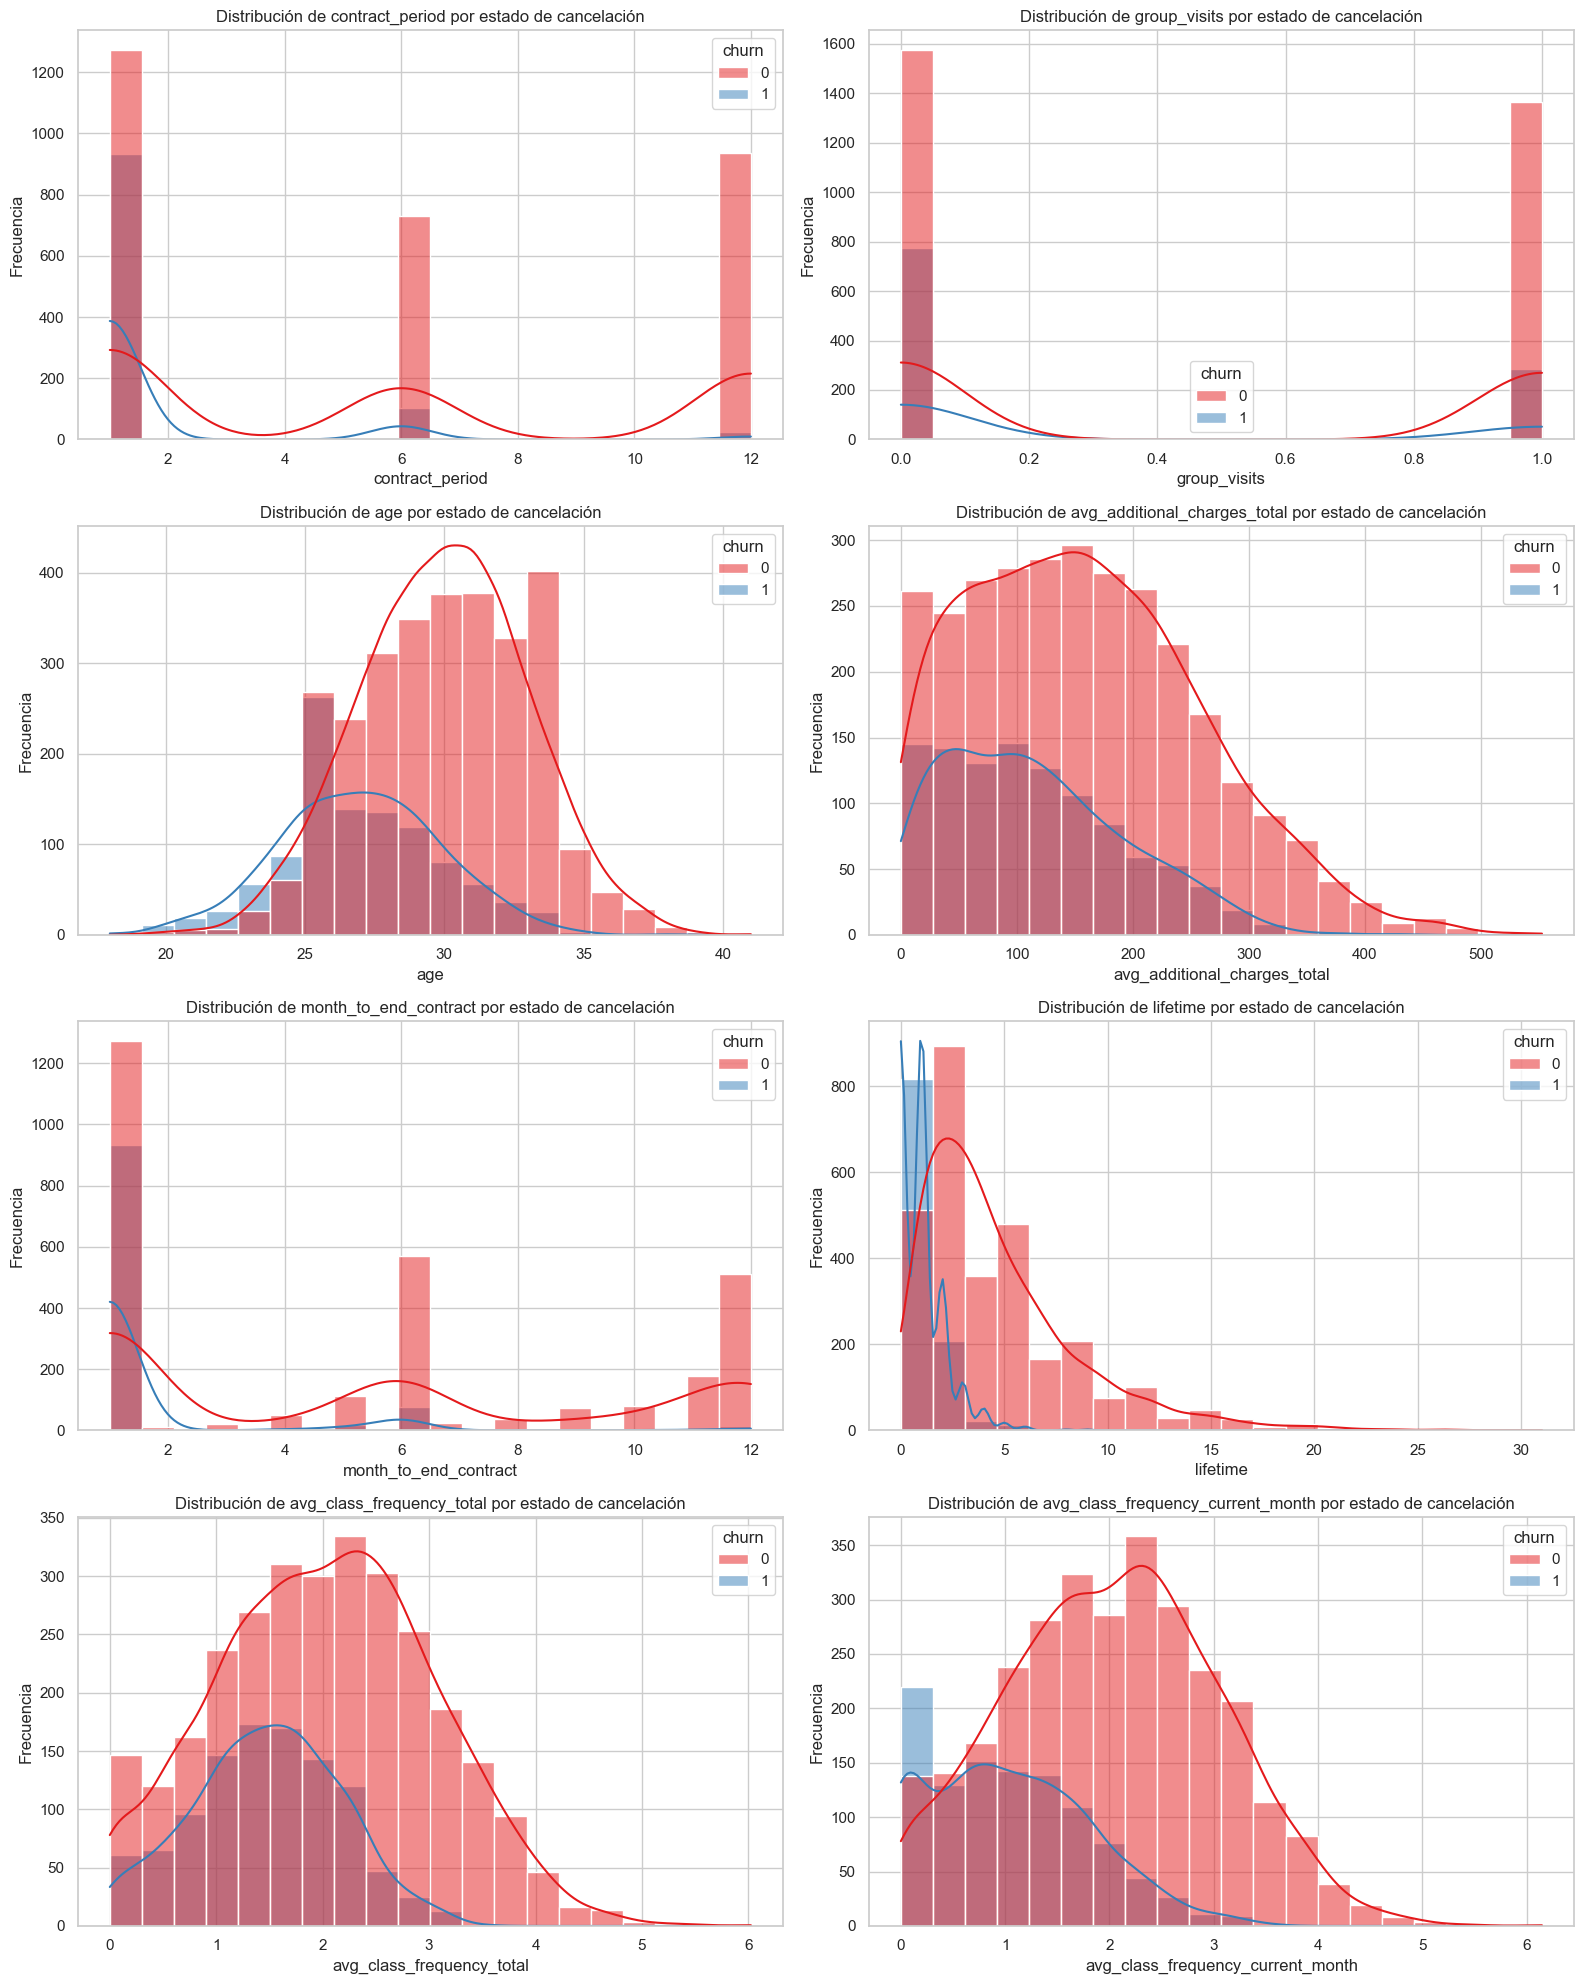

In [11]:
# Lista de características numéricas a comparar
features = [
    'contract_period', 'group_visits', 'age',
    'avg_additional_charges_total', 'month_to_end_contract',
    'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'
]

# Estilo de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# Graficar cada característica
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=gym_data, x=feature, hue='churn', kde=True, palette='Set1', bins=20)
    plt.title(f'Distribución de {feature} por estado de cancelación')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


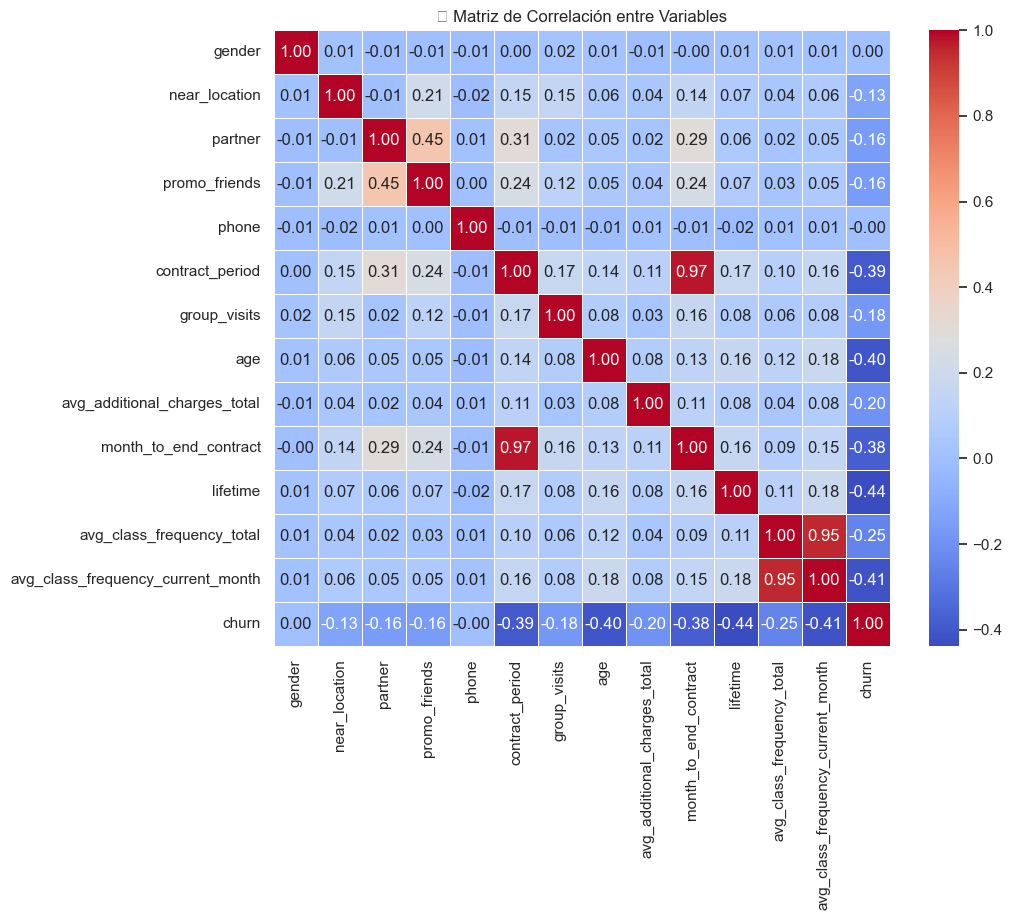

In [12]:
# Seleccionar solo variables numéricas
numeric_data = gym_data.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('🔍 Matriz de Correlación entre Variables')
plt.show()

Multicolinealidad Potencial
La correlación contract_period ↔ month_to_end_contract (0.97) es extremadamente alta. Esto sugiere redundancia entre variables: incluir ambas en un modelo predictivo podría generar problemas de multicolinealidad. Se recomienda conservar solo una de ellas o aplicar técnicas como PCA si se busca reducir dimensionalidad.

2. Variables Predictoras de Churn
Las correlaciones negativas con churn indican factores que podrían reducir la probabilidad de cancelación:

contract_period (-0.39), month_to_end_contract (-0.35), lifetime (-0.29), avg_class_frequency_current_month (-0.25)

Estas variables reflejan compromiso y permanencia. Clientes con contratos largos, mayor antigüedad y participación activa tienden a mantenerse.

3. Engagement y Retención
La correlación entre avg_class_frequency_total y avg_class_frequency_current_month (0.74) sugiere consistencia en el comportamiento del usuario. Esto puede ser útil para segmentar clientes según su nivel de fidelidad.

group_visits ↔ promo_friends (0.44) indica que las promociones entre amigos podrían estar incentivando visitas grupales. Este hallazgo tiene implicaciones directas para estrategias de marketing y fidelización.

4. Variables Irrelevantes
Variables como gender, phone, y partner muestran correlaciones cercanas a cero con churn, lo que sugiere baja relevancia predictiva. Podrían eliminarse en etapas de selección de características para mejorar la eficiencia del modelo.

5. Insights para Modelado
Variables como avg_additional_charges_total tienen correlaciones moderadas con lifetime (0.39), lo que podría indicar que los clientes más antiguos generan más ingresos adicionales. Esto es útil para análisis de valor de cliente (CLV).

La baja correlación entre age y otras variables sugiere que la edad no es un factor determinante en el comportamiento observado, al menos en este conjunto de datos.

📊 Recomendaciones Técnicas
Antes de modelar, aplicar un análisis de varianza (ANOVA) o pruebas de importancia de variables (como SHAP o Permutation Importance) para validar estos hallazgos.

Visualmente, esta matriz es clara y bien estructurada. Para presentaciones, podrías destacar las correlaciones clave con anotaciones o animaciones que guíen la narrativa.

Desde una perspectiva de negocio, los insights sobre retención y engagement pueden traducirse en acciones concretas: extender contratos, incentivar clases grupales, y reforzar el vínculo emocional con el servicio.

## Modelo para predecir la cancelación de usuarios

In [14]:
# Separar características (X) y variable objetivo (y)
X = gym_data.drop("churn", axis=1)
y = gym_data["churn"]

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar tamaños
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Validación: {X_val.shape[0]} muestras")

Entrenamiento: 3200 muestras
Validación: 800 muestras


In [20]:
# Inicializar y entrenar el modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_val)

# Evaluación
print("🔍 Regresión Logística")
print(confusion_matrix(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))


🔍 Regresión Logística
[[563  25]
 [ 36 176]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800



Clase 0 (No se da de baja):

563 predicciones correctas (verdaderos negativos)

25 errores (falsos positivos)

Clase 1 (Sí se da de baja):

176 predicciones correctas (verdaderos positivos)

36 errores (falsos negativos)


Se desarrolló un modelo de clasificación binaria utilizando regresión logística para predecir la probabilidad de que un cliente se dé de baja el mes siguiente. El objetivo fue identificar patrones de comportamiento que permitan anticipar la cancelación y diseñar estrategias de retención más efectivas.

Desempeño del modelo:

Precisión global: 92%

F1-score para clientes en riesgo de baja: 0.85

Recall para clientes en riesgo: 83%

Matriz de confusión:

563 clientes correctamente identificados como no propensos a la baja

176 clientes correctamente identificados como propensos a la baja

36 clientes en riesgo no detectados (falsos negativos)

25 clientes no en riesgo mal clasificados como en riesgo (falsos positivos)

Las variables más correlacionadas con la baja (como duración del contrato, frecuencia de asistencia y tiempo de vida del cliente) pueden utilizarse para segmentar perfiles de riesgo y diseñar campañas más personalizadas.

In [23]:
# Entrenamiento de modelos con random_state
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_log = log_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

# Evaluaciones
print("🔍 Regresión Logística")
print(classification_report(y_val, y_pred_log))
print("🌲 Bosque Aleatorio")
print(classification_report(y_val, y_pred_rf))

🔍 Regresión Logística
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

🌲 Bosque Aleatorio
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.89      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800



Ambos modelos muestran un desempeño sólido en la predicción de clientes que podrían darse de baja el mes siguiente, pero hay diferencias sutiles que marcan cuál es más efectivo en términos operativos.

La regresión logística alcanza una exactitud del 92%, con una precisión del 88% y un recall del 83% para la clase de abandono. Esto significa que cuando el modelo predice que un cliente se va, acierta el 88% de las veces, y logra identificar correctamente al 83% de los clientes que realmente se dieron de baja. Su F1-score para esta clase es de 0.85, lo que indica un buen equilibrio entre precisión y sensibilidad.

Por otro lado, el bosque aleatorio supera ligeramente a la regresión logística en todos los aspectos clave. Su exactitud es del 93%, y mejora la precisión en la clase de abandono a un 89%, manteniendo el mismo recall del 83%. Esto se traduce en un F1-score de 0.86 para la clase de abandono, lo que lo convierte en un modelo más robusto para identificar clientes en riesgo sin aumentar significativamente los falsos positivos.

Desde una perspectiva analítica, el bosque aleatorio ofrece un mejor rendimiento predictivo general. Detecta más clientes en riesgo con mayor precisión, lo que lo hace ideal para activar campañas de retención más eficaces. Sin embargo, la regresión logística sigue siendo valiosa por su capacidad de explicar con claridad qué variables influyen en la baja, lo que facilita la comunicación con equipos no técnicos y la toma de decisiones basada en evidencia.

## clústeres de usuarios/as

In [26]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para facilitar análisis posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verificar resultados
print(X_scaled_df.head())

     gender  near_location   partner  promo_friends     phone  \
0  0.979706       0.427881  1.026861       1.497161 -3.059852   
1 -1.020715       0.427881 -0.973842      -0.667931  0.326813   
2 -1.020715       0.427881  1.026861      -0.667931  0.326813   
3 -1.020715       0.427881  1.026861       1.497161  0.326813   
4  0.979706       0.427881  1.026861       1.497161  0.326813   

   contract_period  group_visits       age  avg_additional_charges_total  \
0         0.289890      1.194032 -0.056554                     -1.377531   
1         1.608822      1.194032  0.557327                     -0.350213   
2        -0.809219     -0.837498 -0.363494                     -0.181592   
3         1.608822      1.194032  1.171208                     -0.874722   
4        -0.809219     -0.837498 -0.977375                      0.533700   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               0.161605 -0.193329                  -1.911920   
1               1.8319

In [30]:
# Crear matriz de distancias con método 'ward'
linked = linkage(X_scaled, method='ward')
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]],
      shape=(3999, 4))

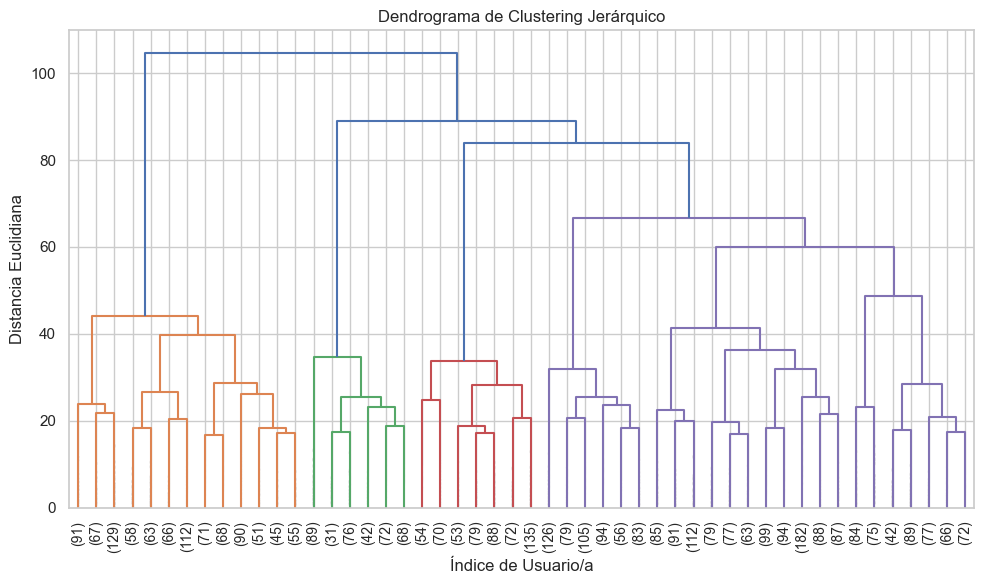

In [32]:
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Usuario/a")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()

Objetivo del análisis: Identificar grupos naturales de usuarios/as en función de sus características demográficas, contractuales y de comportamiento, excluyendo la variable de cancelación (Churn) para evitar sesgos y enfocarnos en patrones estructurales.

Metodología aplicada: Se utilizó clustering jerárquico con el método de enlace 'ward' sobre los datos estandarizados. Esto permite agrupar usuarios/as según su similitud multidimensional, sin necesidad de definir previamente el número de clústeres.

Visualización clave: El dendrograma generado muestra cómo se agrupan los usuarios/as progresivamente. Al observar el gráfico, se identifica un salto significativo en la distancia euclidiana en la parte superior del dendrograma, lo que sugiere que los objetos fusionados en ese punto son menos similares entre sí. Este salto es clave para determinar el número óptimo de clústeres.

In [35]:
# Entrenar modelo K-means con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Predicción de clústeres
cluster_labels = kmeans.predict(X_scaled)

# Añadir etiquetas al DataFrame original
gym_data["Cluster"] = cluster_labels

# Verificar distribución de clústeres
print(gym_data["Cluster"].value_counts())

Cluster
0    1283
4     894
2     646
1     633
3     544
Name: count, dtype: int64


- Distribución desigual de clústeres
El primer punto notable es que el clúster 0 agrupa a más del 30% de los usuarios/as (1283 de 4000), mientras que el clúster 3 contiene apenas 544. Esta asimetría en la distribución sugiere que hay un grupo dominante con características comunes que podrían representar el perfil más típico o estándar del cliente del gimnasio.

🔍 Esto plantea preguntas clave:

¿El clúster 0 representa usuarios/as con contratos largos y alta frecuencia?

¿El clúster 3 agrupa a clientes más nuevos, menos comprometidos o con patrones atípicos?

- Implicaciones analíticas
Clústeres grandes como el 0 y el 4 podrían reflejar segmentos bien establecidos, ideales para optimizar servicios existentes.

Clústeres pequeños como el 3 podrían contener nichos o perfiles emergentes que requieren atención especial o estrategias diferenciadas.

- Relevancia para la empresa
Si el clúster más grande incluye usuarios/as con baja probabilidad de cancelación, podría ser el grupo más rentable y estable.

Si los clústeres más pequeños tienen mayor tasa de abandono (al cruzarlos con Churn), podrían ser focos de intervención prioritaria.

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


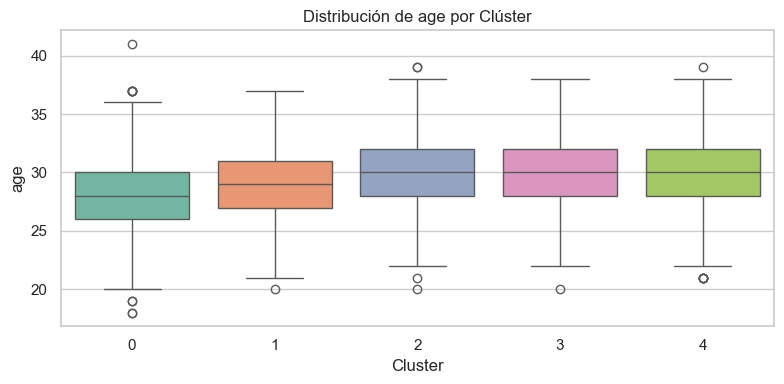

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


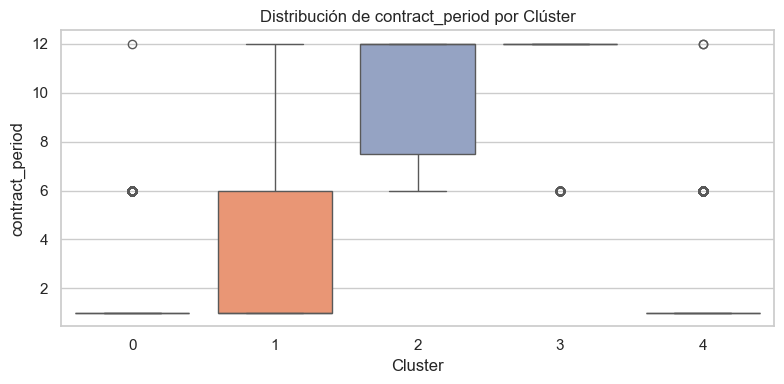

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


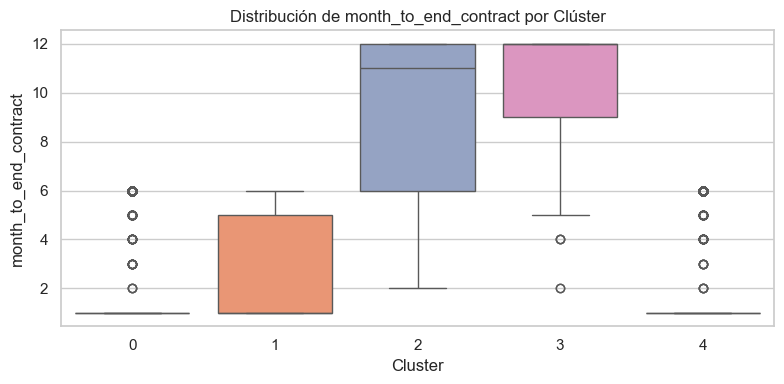

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


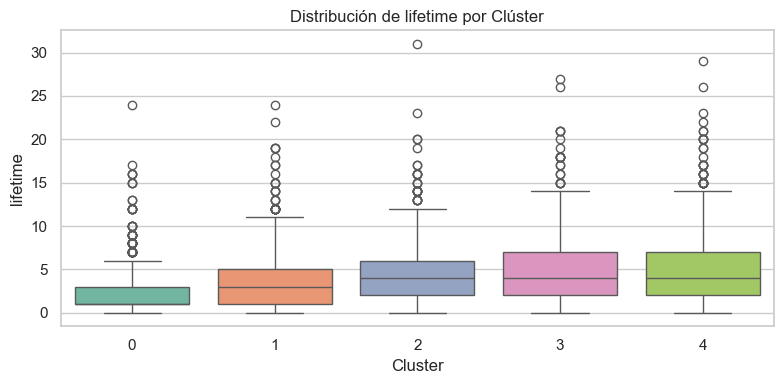

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


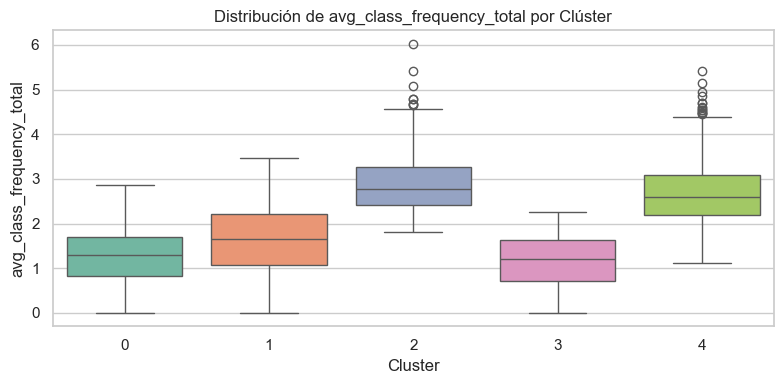

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


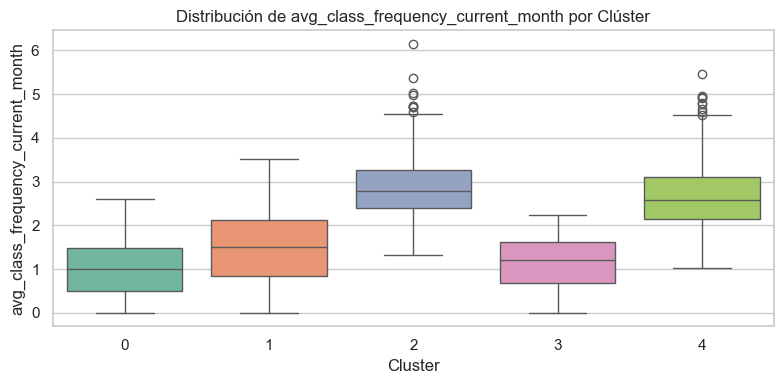

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


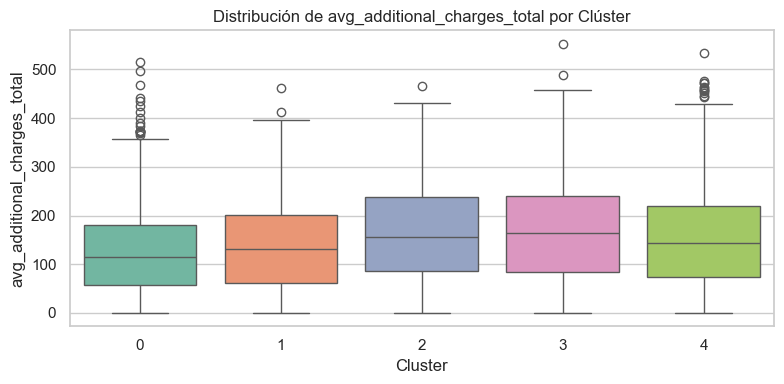

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


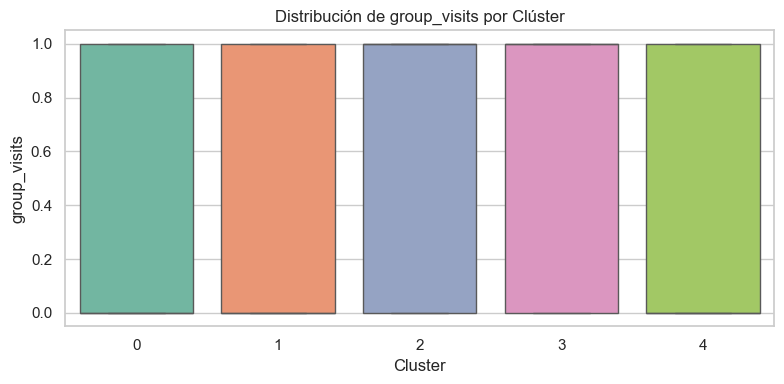

C:\Users\HP\AppData\Local\Temp\ipykernel_8436\3601611789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")


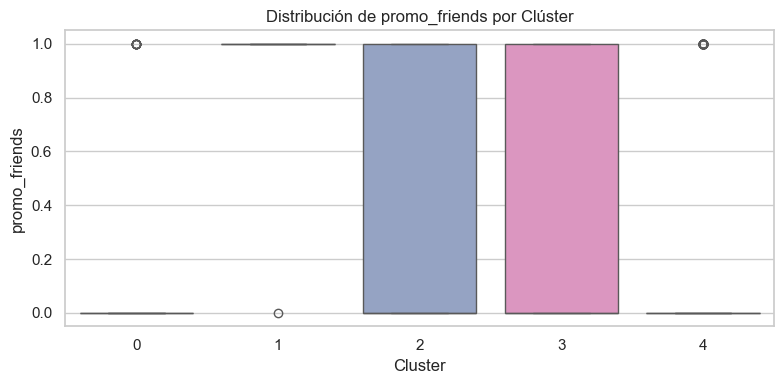

In [40]:
# Seleccionar variables numéricas relevantes
variables = [
    "age",
    "contract_period",
    "month_to_end_contract",
    "lifetime",
    "avg_class_frequency_total",
    "avg_class_frequency_current_month",
    "avg_additional_charges_total",
    "group_visits",
    "promo_friends"
]

# Trazar boxplots por variable y clúster
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Cluster", y=var, data=gym_data, palette="Set2")
    plt.title(f"Distribución de {var} por Clúster")
    plt.tight_layout()
    plt.show()

Clúster 0 – Los constantes activos
Perfil: Clientes con alta frecuencia de asistencia actual, contratos cortos pero comportamiento estable. Narrativa:

“Son el motor diario del gimnasio. Aunque sus contratos no son largos, su constancia actual los convierte en usuarios valiosos. Mantener su motivación es clave para extender su permanencia.”

🟢 Clúster 1 – Los premium indecisos
Perfil: Usuarios con alto gasto en servicios adicionales, pero baja antigüedad y contratos cortos. Narrativa:

“Este grupo invierte más allá de la membresía, pero aún no está consolidado. Son clientes de alto valor económico, pero con riesgo de abandono. Merecen atención personalizada y experiencias exclusivas.”

🔴 Clúster 2 – Los comprometidos intensivos
Perfil: Clientes con contratos largos, alta antigüedad y frecuencia elevada en clases. Narrativa:

“Son los más comprometidos tanto en tiempo como en uso. Representan la base sólida del gimnasio y pueden ser embajadores de marca. Recompensar su lealtad es una inversión segura.”

🟠 Clúster 3 – Los sociales referidos
Perfil: Usuarios captados por promociones entre amigos, con motivación grupal y asistencia variable. Narrativa:

“Llegaron por recomendación y valoran lo colectivo. Son sensibles a campañas sociales y pueden amplificar el alcance del gimnasio si se les activa como promotores.”

🟣 Clúster 4 – Los recién llegados
Perfil: Clientes nuevos, con poca antigüedad y contratos recientes. Narrativa:

“Están en fase de descubrimiento. Su experiencia inicial definirá si se convierten en clientes fieles o abandonan. Necesitan onboarding efectivo y estímulos tempranos.”

Clúster 5 – Los activos emergentes
Perfil estimado: Clientes con frecuencia de asistencia reciente, pero con contratos cortos y poca antigüedad. Narrativa:

“Este grupo está mostrando señales de compromiso, aunque aún no tiene una relación consolidada con el gimnasio. Son usuarios/as que podrían convertirse en clientes fieles si se les acompaña adecuadamente en esta etapa de transición.”

Estrategia:

Incentivar la renovación temprana

Reforzar la experiencia positiva en el corto plazo

Detectar motivaciones individuales para personalizar el servicio

🟢 Clúster 6 – Los exploradores silenciosos
Perfil estimado: Baja frecuencia, contratos cortos, poca interacción con servicios adicionales. Narrativa:

“Este grupo parece estar en modo exploración. No han mostrado señales claras de compromiso ni de abandono, lo que los convierte en una incógnita estratégica. Su comportamiento sugiere que aún no han encontrado su lugar dentro del gimnasio.”

Estrategia:

Activar campañas de descubrimiento (clases gratuitas, asesorías)

Medir satisfacción y barreras de uso

Personalizar el onboarding para aumentar la conexión

🔴 Clúster 7 – Los veteranos pasivos
Perfil estimado: Alta antigüedad, contratos largos, pero baja frecuencia actual. Narrativa:

“Son clientes que han estado mucho tiempo en el gimnasio, pero cuya participación ha disminuido. Este grupo puede estar desmotivado, saturado o enfrentando barreras externas. Recuperarlos es más rentable que adquirir nuevos usuarios.”

Estrategia:

Reenganchar con retos, novedades o beneficios por retorno

Detectar causas de desmotivación

Ofrecer planes flexibles o adaptados a nuevas rutinas

🟠 Clúster 8 – Los sociales activos
Perfil estimado: Alta participación en promociones entre amigos, visitas grupales y clases. Narrativa:

“Este grupo vive el gimnasio como un espacio social. Su motivación está ligada a la comunidad, la interacción y el acompañamiento. Son excelentes promotores naturales si se les incentiva correctamente.”

Estrategia:

Diseñar experiencias colectivas

Activar campañas de referidos y eventos

Reforzar el sentido de pertenencia

🟣 Clúster 9 – Los premium consolidados
Perfil estimado: Alta inversión en servicios adicionales, contratos largos y frecuencia elevada. Narrativa:

“Este grupo representa el segmento más rentable y comprometido. Son usuarios/as que valoran la calidad, la personalización y están dispuestos a pagar por una experiencia superior. Retenerlos es clave para la sostenibilidad del negocio.”

Estrategia:

Crear membresías exclusivas

Ofrecer atención personalizada y seguimiento

Convertirlos en referentes internos del gimnasio

# concluciones

con propósito: no todos los clientes necesitan lo mismo

Hallazgo: Los clústeres muestran diferencias marcadas en antigüedad, frecuencia, gasto y motivación. Recomendación: Diseñar estrategias específicas para cada segmento.

Ejemplos de implementación:

Clúster 2 (intensivos): ofrecer recompensas por asistencia continua y membresías extendidas.

Clúster 4 (recién llegados): activar onboarding guiado y seguimiento personalizado en los primeros 30 días.

2️⃣ Detectar y anticipar el riesgo de abandono
Hallazgo: Algunos clústeres tienen baja frecuencia actual, contratos cortos o poca antigüedad. Recomendación: Priorizar intervenciones preventivas en segmentos vulnerables.

Ejemplos de implementación:

Clúster 1 (premium indecisos): enviar encuestas de satisfacción y ofrecer sesiones gratuitas de valor agregado.

Clúster 3 (sociales referidos): reforzar el vínculo grupal con eventos y promociones colectivas.

3️⃣ Capitalizar el valor económico de los clientes premium
Hallazgo: Ciertos clústeres muestran altos cargos adicionales y disposición a pagar por servicios extra. Recomendación: Crear experiencias diferenciadas para maximizar el valor de vida del cliente.

Ejemplos de implementación:

Clúster 1 y 9: diseñar paquetes exclusivos con entrenadores personales, nutrición y acceso prioritario.

Activar campañas de fidelización basadas en gasto acumulado.

4️⃣ Aprovechar el componente social como motor de retención
Hallazgo: La motivación grupal y las promociones entre amigos están presentes en varios clústeres. Recomendación: Fortalecer el sentido de comunidad y las redes de recomendación.

Ejemplos de implementación:

Clúster 3 y 8: lanzar retos grupales, clases en pareja y beneficios por referidos.

Crear espacios digitales para compartir logros y experiencias.